In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/archive.zip')

In [3]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
(df.isna().sum())/(len(df))*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

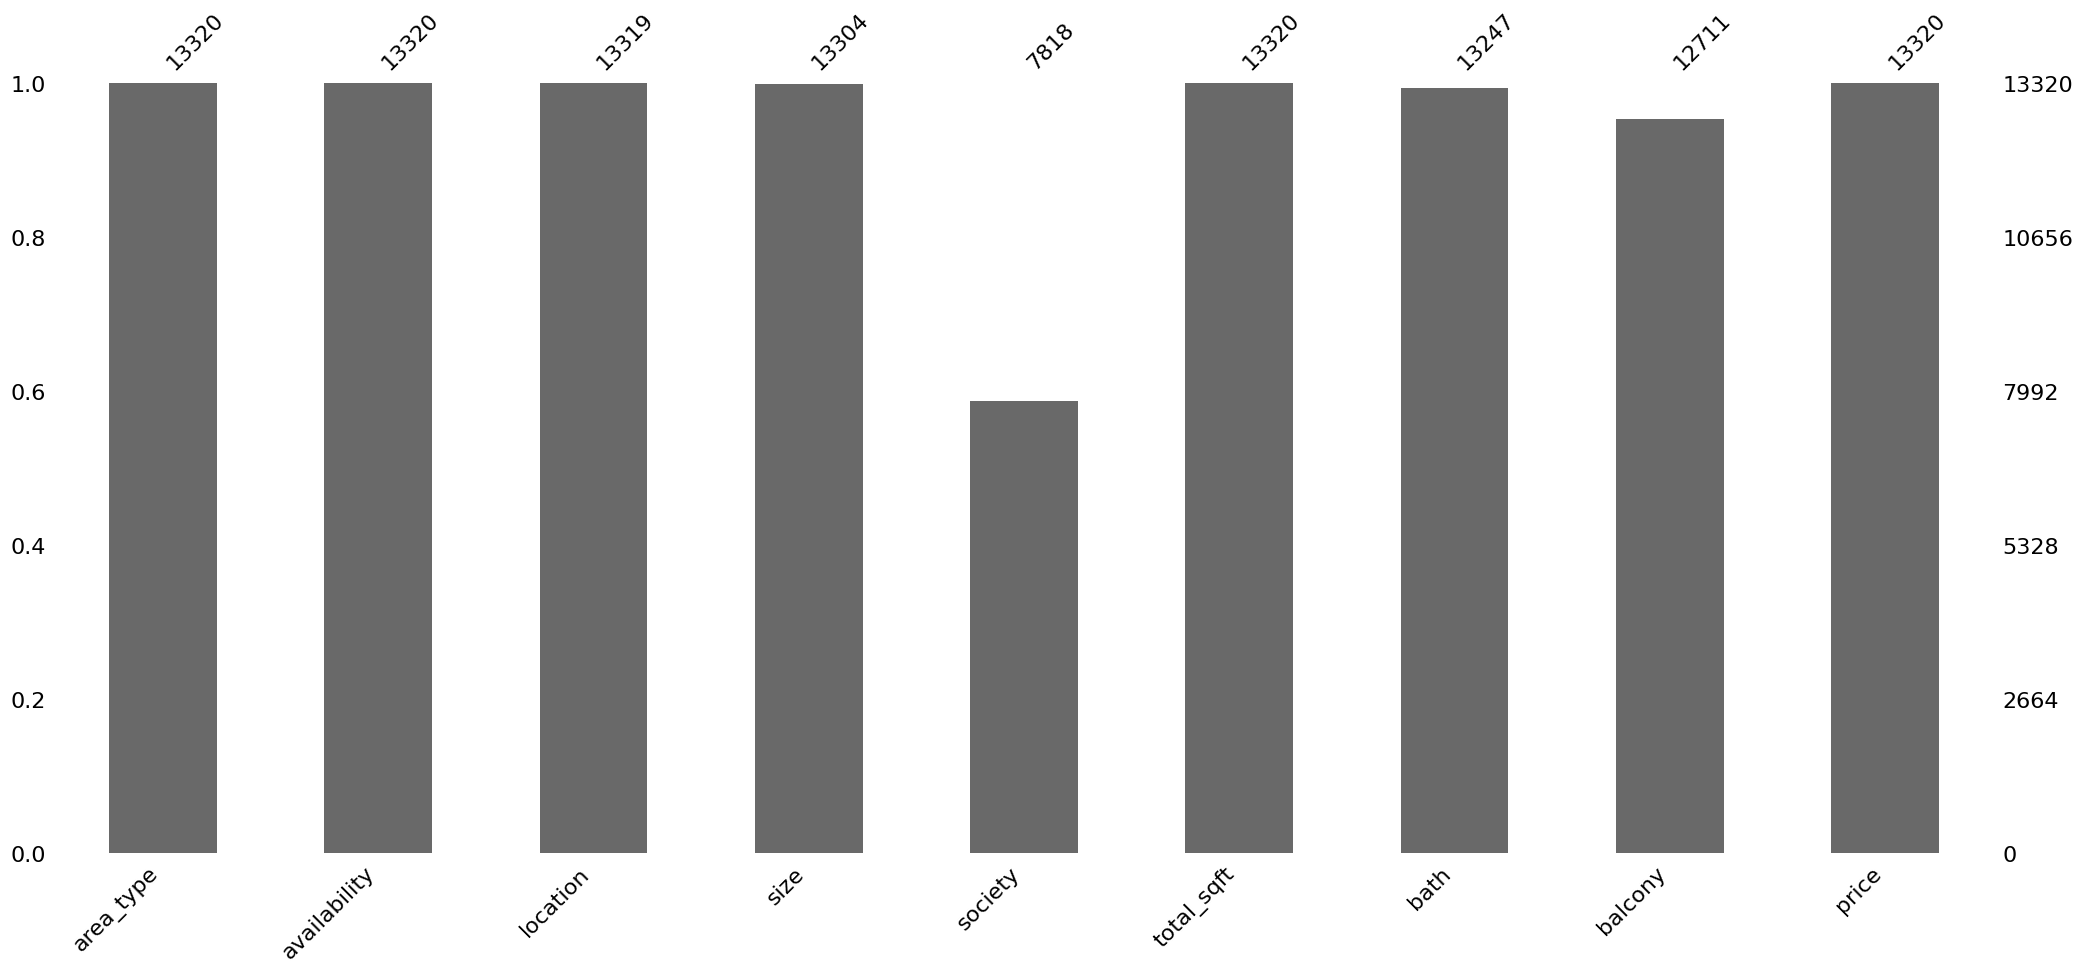

In [7]:
import missingno as msno
msno.bar (df)
plt.show()

In [8]:
df2 = df.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

In [9]:
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [10]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df3.shape

(13246, 5)

Feature Engineering

In [13]:
##Add new feature(integer) for bhk (Bedrooms Hall Kitchen)

df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [14]:
##Explore total_sqft feature

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [16]:
## it convert the sqft into float
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [17]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


In [18]:
##Add new feature called price per square feet
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [19]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [20]:
df5.to_csv("bhp.csv",index=False)

In [21]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [22]:
location_stats.values.sum()

13200

In [23]:
len(location_stats[location_stats>10])

240

In [24]:
len(location_stats[location_stats<=10])

1047

Dimensionality Reduction

In [25]:
##Any location having less than 10 data points should be tagged as "other" location
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [26]:
len(df5.location.unique())

1287

In [27]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

241

In [28]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [29]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [30]:
df5.shape

(13200, 7)

outlier Removal

<Axes: >

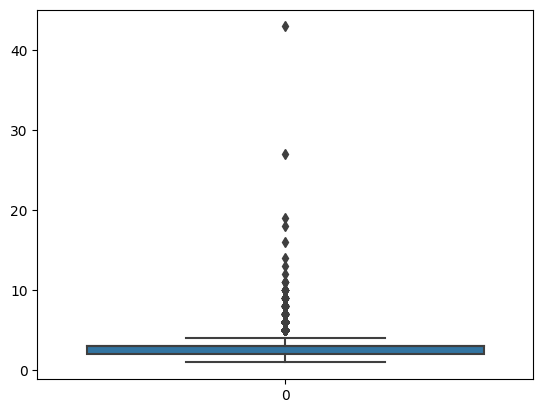

In [31]:
sns.boxplot(df5['bhk'])

In [32]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 7)

<Axes: >

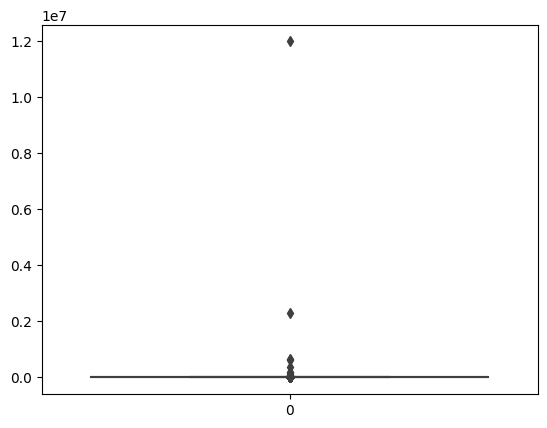

In [33]:
sns.boxplot(df5['price_per_sqft'])

In [34]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [35]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10242, 7)

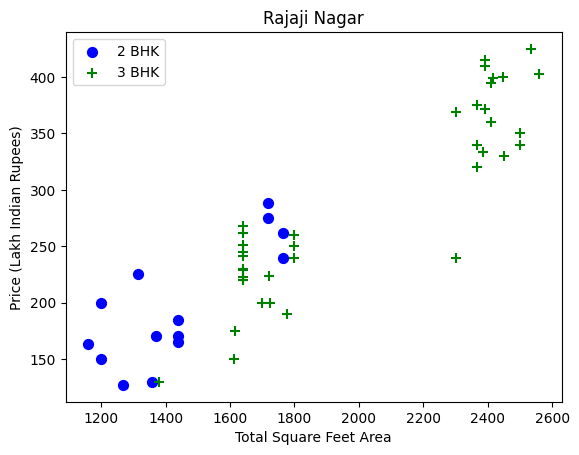

In [36]:
##Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7,"Rajaji Nagar")

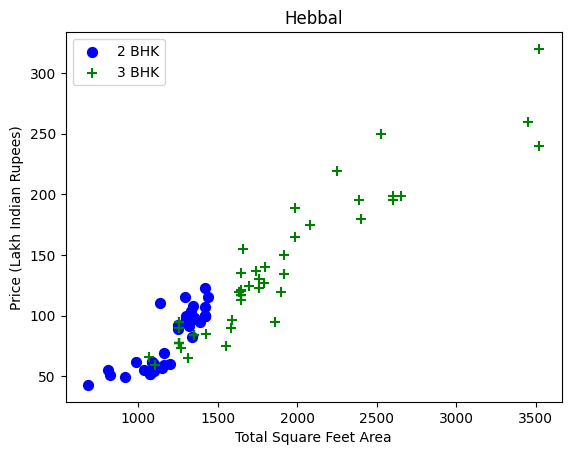

In [37]:
plot_scatter_chart(df7,"Hebbal")

In [38]:
###Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7317, 7)

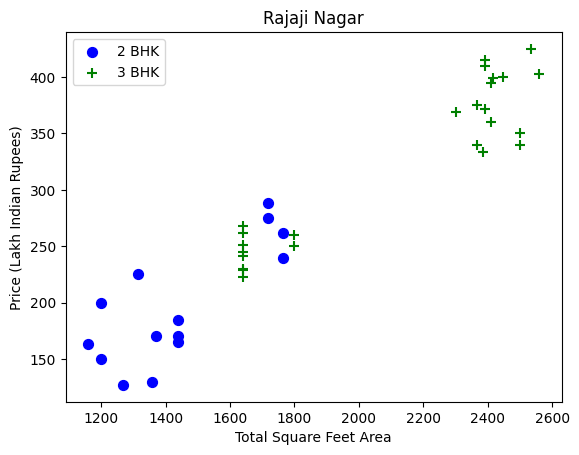

In [39]:
plot_scatter_chart(df8,"Rajaji Nagar")

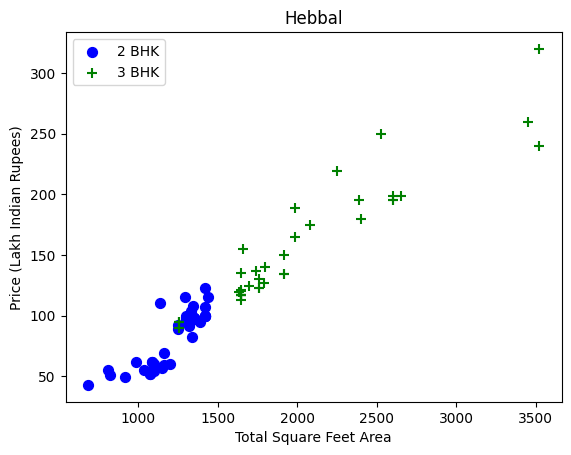

In [40]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

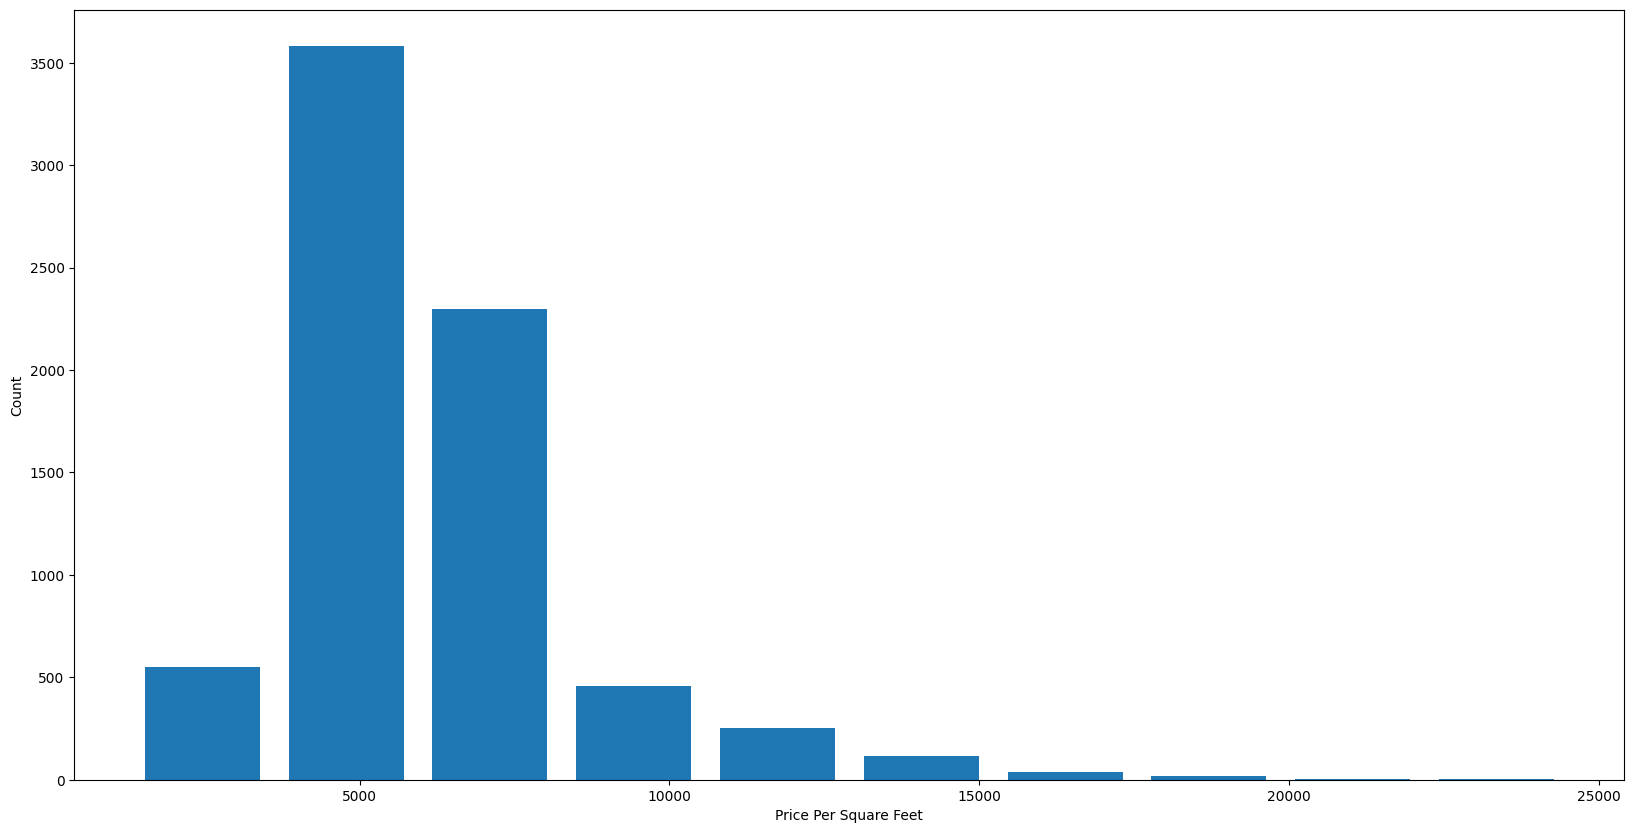

In [41]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

<Axes: >

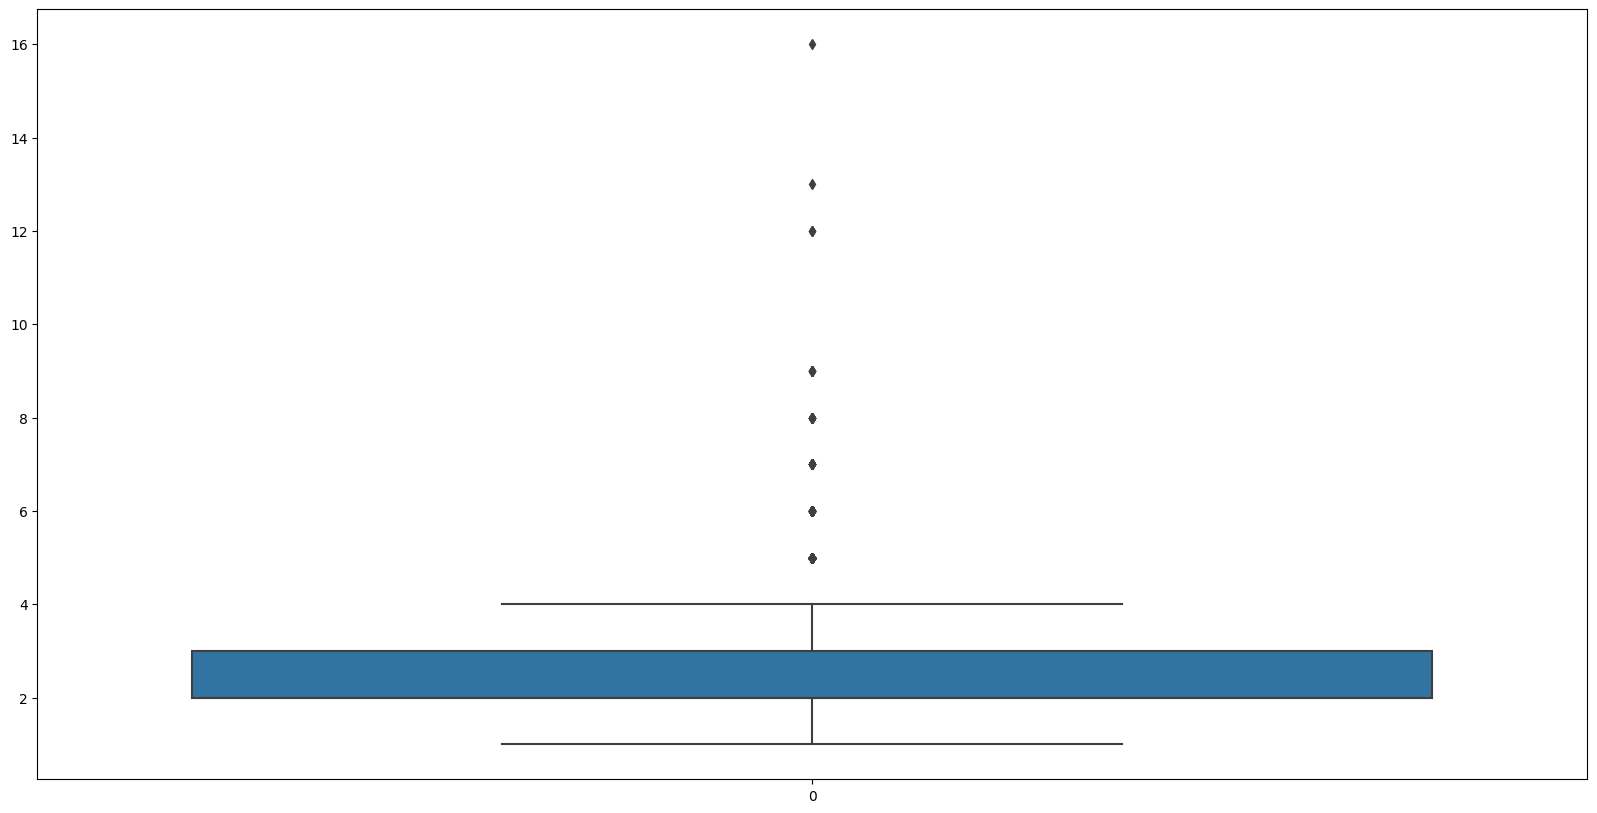

In [42]:
###Outlier Removal of bathroom
sns.boxplot(df8['bath'])

In [43]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

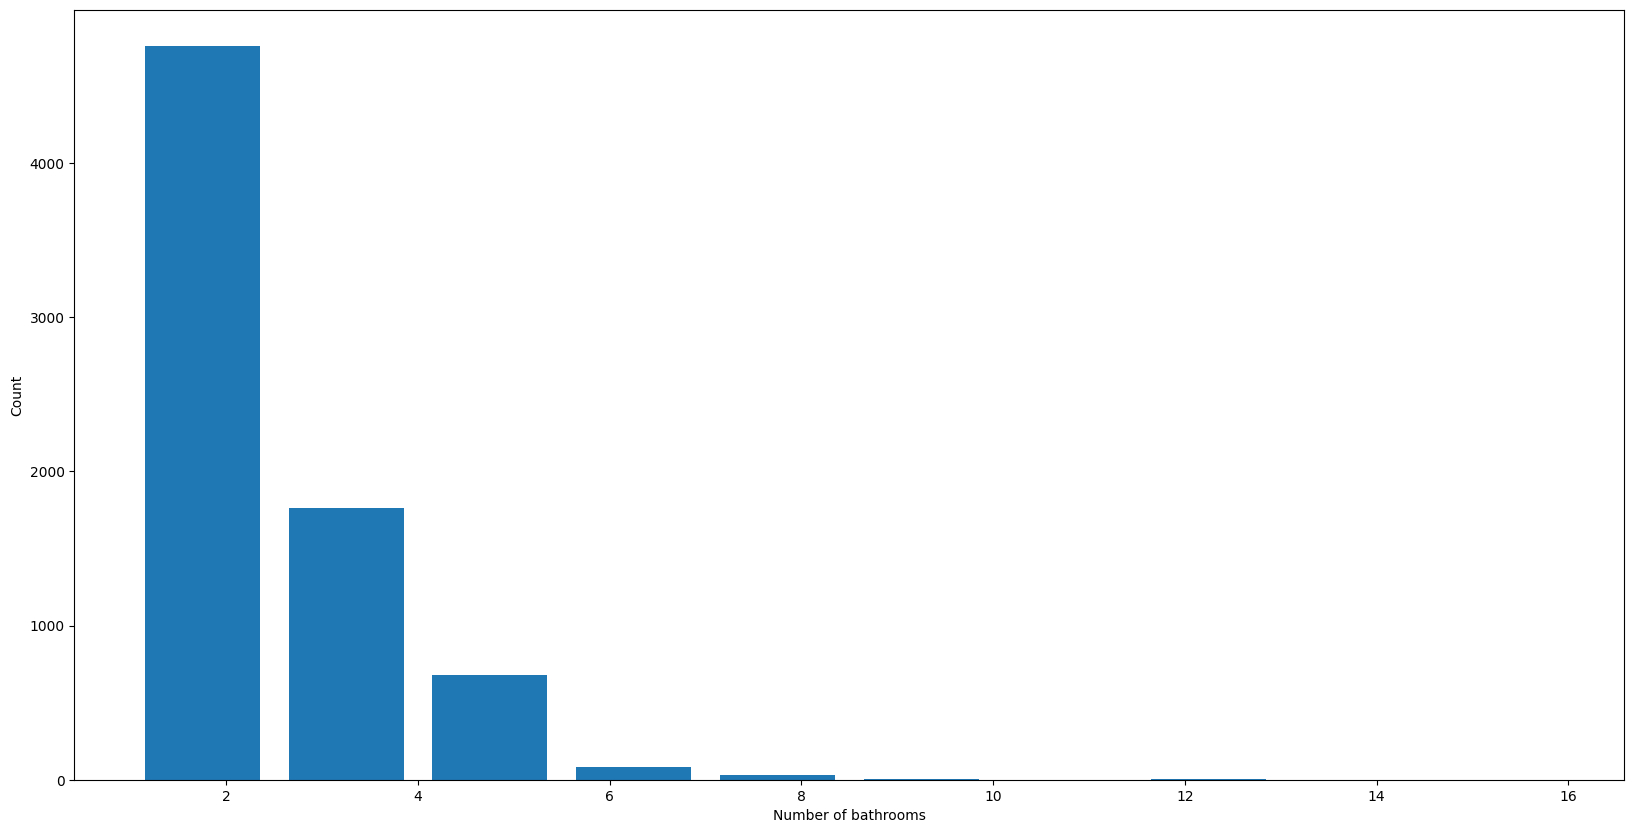

In [44]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [45]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [46]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [47]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7239, 7)

In [48]:
df9.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491


In [49]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)


,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [50]:
##Using One Hot Encoding For Location
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Model Building

In [53]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
X.shape

(7239, 243)

In [55]:
y = df12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [56]:
len(y)

7239

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [58]:
## LinearRegression
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8629132245229443

In [59]:
##Using K Fold cross validation to measure accuracy of our LinearRegression model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

In [60]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

Test the model for few properties

In [61]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [62]:
##price prediction for JP nagar
predict_price('1st Phase JP Nagar',1000, 2, 2)

83.86570258312098

In [63]:
##price prediction for Indira nagar
predict_price('Indira Nagar',1000, 2, 3)

191.80995089177873

In [64]:
##price prediction for yeshwanthpur
predict_price('Yeshwanthpur',1000, 3, 5)

67.39064096585369

In [65]:
##price prediction for Vijayanagar
predict_price('Vijayanagar',1000, 10, 12)

76.42448093365776

In [66]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [67]:
with open('banglore_home_prices_model.pickle','rb')as f:
  mp = pickle.load(f)

In [68]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 7.0.1
    Uninstalling importlib-metadata-7.0.1:
      Successfully uninstalled importlib-metadata-7.0.1


In [130]:
%%writefile app.py
data_location= ["total_sqft", "bath", "bhk", "1st block jayanagar", "1st phase jp nagar", "2nd phase judicial layout", "2nd stage nagarbhavi", "5th block hbr layout", "5th phase jp nagar", "6th phase jp nagar", "7th phase jp nagar", "8th phase jp nagar", "9th phase jp nagar", "aecs layout", "abbigere", "akshaya nagar", "ambalipura", "ambedkar nagar", "amruthahalli", "anandapura", "ananth nagar", "anekal", "anjanapura", "ardendale", "arekere", "attibele", "beml layout", "btm 2nd stage", "btm layout", "babusapalaya", "badavala nagar", "balagere", "banashankari", "banashankari stage ii", "banashankari stage iii", "banashankari stage v", "banashankari stage vi", "banaswadi", "banjara layout", "bannerghatta", "bannerghatta road", "basavangudi", "basaveshwara nagar", "battarahalli", "begur", "begur road", "bellandur", "benson town", "bharathi nagar", "bhoganhalli", "billekahalli", "binny pete", "bisuvanahalli", "bommanahalli", "bommasandra", "bommasandra industrial area", "bommenahalli", "brookefield", "budigere", "cv raman nagar", "chamrajpet", "chandapura", "channasandra", "chikka tirupathi", "chikkabanavar", "chikkalasandra", "choodasandra", "cooke town", "cox town", "cunningham road", "dasanapura", "dasarahalli", "devanahalli", "devarachikkanahalli", "dodda nekkundi", "doddaballapur", "doddakallasandra", "doddathoguru", "domlur", "dommasandra", "epip zone", "electronic city", "electronic city phase ii", "electronics city phase 1", "frazer town", "gm palaya", "garudachar palya", "giri nagar", "gollarapalya hosahalli", "gottigere", "green glen layout", "gubbalala", "gunjur", "hal 2nd stage", "hbr layout", "hrbr layout", "hsr layout", "haralur road", "harlur", "hebbal", "hebbal kempapura", "hegde nagar", "hennur", "hennur road", "hoodi", "horamavu agara", "horamavu banaswadi", "hormavu", "hosa road", "hosakerehalli", "hoskote", "hosur road", "hulimavu", "isro layout", "itpl", "iblur village", "indira nagar", "jp nagar", "jakkur", "jalahalli", "jalahalli east", "jigani", "judicial layout", "kr puram", "kadubeesanahalli", "kadugodi", "kaggadasapura", "kaggalipura", "kaikondrahalli", "kalena agrahara", "kalyan nagar", "kambipura", "kammanahalli", "kammasandra", "kanakapura", "kanakpura road", "kannamangala", "karuna nagar", "kasavanhalli", "kasturi nagar", "kathriguppe", "kaval byrasandra", "kenchenahalli", "kengeri", "kengeri satellite town", "kereguddadahalli", "kodichikkanahalli", "kodigehaali", "kodigehalli", "kodihalli", "kogilu", "konanakunte", "koramangala", "kothannur", "kothanur", "kudlu", "kudlu gate", "kumaraswami layout", "kundalahalli", "lb shastri nagar", "laggere", "lakshminarayana pura", "lingadheeranahalli", "magadi road", "mahadevpura", "mahalakshmi layout", "mallasandra", "malleshpalya", "malleshwaram", "marathahalli", "margondanahalli", "marsur", "mico layout", "munnekollal", "murugeshpalya", "mysore road", "ngr layout", "nri layout", "nagarbhavi", "nagasandra", "nagavara", "nagavarapalya", "narayanapura", "neeladri nagar", "nehru nagar", "ombr layout", "old airport road", "old madras road", "padmanabhanagar", "pai layout", "panathur", "parappana agrahara", "pattandur agrahara", "poorna pragna layout", "prithvi layout", "r.t. nagar", "rachenahalli", "raja rajeshwari nagar", "rajaji nagar", "rajiv nagar", "ramagondanahalli", "ramamurthy nagar", "rayasandra", "sahakara nagar", "sanjay nagar", "sarakki nagar", "sarjapur", "sarjapur  road", "sarjapura - attibele road", "sector 2 hsr layout", "sector 7 hsr layout", "seegehalli", "shampura", "shivaji nagar", "singasandra", "somasundara palya", "sompura", "sonnenahalli", "subramanyapura", "sultan palaya", "tc palaya", "talaghattapura", "thanisandra", "thigalarapalya", "thubarahalli", "tindlu", "tumkur road", "ulsoor", "uttarahalli", "varthur", "varthur road", "vasanthapura", "vidyaranyapura", "vijayanagar", "vishveshwarya layout", "vishwapriya layout", "vittasandra", "whitefield", "yelachenahalli", "yelahanka", "yelahanka new town", "yelenahalli", "yeshwanthpur"]


import pickle

import numpy as np
import streamlit as st

st.title(' Bangalore Home Price Prediction ')


with open('./banglore_home_prices_model.pickle', 'rb') as f:
    model = pickle.load(f)

def get_estimated_price(location,sqft,bhk,bath):

    loc_index = data_location.index(location.lower())

    x = np.zeros(len(data_location))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk

    x[loc_index] = 1

    return round(model.predict([x])[0],2)

sqfit = st.slider(' Area in square feet',  min_value=100, max_value=5000, step=100)
bathroom = st.slider('Number of bathrooms', min_value=1, max_value=5, step=1)
bhk1 = st.slider('BHK', min_value=1, max_value=5, step=1)


print(get_estimated_price("1st phase jp nagar",2000,2,2))

a1=[ "1st block jayanagar", "1st phase jp nagar", "2nd phase judicial layout", "2nd stage nagarbhavi", "5th block hbr layout", "5th phase jp nagar", "6th phase jp nagar", "7th phase jp nagar", "8th phase jp nagar", "9th phase jp nagar", "aecs layout", "abbigere", "akshaya nagar", "ambalipura", "ambedkar nagar", "amruthahalli", "anandapura", "ananth nagar", "anekal", "anjanapura", "ardendale", "arekere", "attibele", "beml layout", "btm 2nd stage", "btm layout", "babusapalaya", "badavala nagar", "balagere", "banashankari", "banashankari stage ii", "banashankari stage iii", "banashankari stage v", "banashankari stage vi", "banaswadi", "banjara layout", "bannerghatta", "bannerghatta road", "basavangudi", "basaveshwara nagar", "battarahalli", "begur", "begur road", "bellandur", "benson town", "bharathi nagar", "bhoganhalli", "billekahalli", "binny pete", "bisuvanahalli", "bommanahalli", "bommasandra", "bommasandra industrial area", "bommenahalli", "brookefield", "budigere", "cv raman nagar", "chamrajpet", "chandapura", "channasandra", "chikka tirupathi", "chikkabanavar", "chikkalasandra", "choodasandra", "cooke town", "cox town", "cunningham road", "dasanapura", "dasarahalli", "devanahalli", "devarachikkanahalli", "dodda nekkundi", "doddaballapur", "doddakallasandra", "doddathoguru", "domlur", "dommasandra", "epip zone", "electronic city", "electronic city phase ii", "electronics city phase 1", "frazer town", "gm palaya", "garudachar palya", "giri nagar", "gollarapalya hosahalli", "gottigere", "green glen layout", "gubbalala", "gunjur", "hal 2nd stage", "hbr layout", "hrbr layout", "hsr layout", "haralur road", "harlur", "hebbal", "hebbal kempapura", "hegde nagar", "hennur", "hennur road", "hoodi", "horamavu agara", "horamavu banaswadi", "hormavu", "hosa road", "hosakerehalli", "hoskote", "hosur road", "hulimavu", "isro layout", "itpl", "iblur village", "indira nagar", "jp nagar", "jakkur", "jalahalli", "jalahalli east", "jigani", "judicial layout", "kr puram", "kadubeesanahalli", "kadugodi", "kaggadasapura", "kaggalipura", "kaikondrahalli", "kalena agrahara", "kalyan nagar", "kambipura", "kammanahalli", "kammasandra", "kanakapura", "kanakpura road", "kannamangala", "karuna nagar", "kasavanhalli", "kasturi nagar", "kathriguppe", "kaval byrasandra", "kenchenahalli", "kengeri", "kengeri satellite town", "kereguddadahalli", "kodichikkanahalli", "kodigehaali", "kodigehalli", "kodihalli", "kogilu", "konanakunte", "koramangala", "kothannur", "kothanur", "kudlu", "kudlu gate", "kumaraswami layout", "kundalahalli", "lb shastri nagar", "laggere", "lakshminarayana pura", "lingadheeranahalli", "magadi road", "mahadevpura", "mahalakshmi layout", "mallasandra", "malleshpalya", "malleshwaram", "marathahalli", "margondanahalli", "marsur", "mico layout", "munnekollal", "murugeshpalya", "mysore road", "ngr layout", "nri layout", "nagarbhavi", "nagasandra", "nagavara", "nagavarapalya", "narayanapura", "neeladri nagar", "nehru nagar", "ombr layout", "old airport road", "old madras road", "padmanabhanagar", "pai layout", "panathur", "parappana agrahara", "pattandur agrahara", "poorna pragna layout", "prithvi layout", "r.t. nagar", "rachenahalli", "raja rajeshwari nagar", "rajaji nagar", "rajiv nagar", "ramagondanahalli", "ramamurthy nagar", "rayasandra", "sahakara nagar", "sanjay nagar", "sarakki nagar", "sarjapur", "sarjapur  road", "sarjapura - attibele road", "sector 2 hsr layout", "sector 7 hsr layout", "seegehalli", "shampura", "shivaji nagar", "singasandra", "somasundara palya", "sompura", "sonnenahalli", "subramanyapura", "sultan palaya", "tc palaya", "talaghattapura", "thanisandra", "thigalarapalya", "thubarahalli", "tindlu", "tumkur road", "ulsoor", "uttarahalli", "varthur", "varthur road", "vasanthapura", "vidyaranyapura", "vijayanagar", "vishveshwarya layout", "vishwapriya layout", "vittasandra", "whitefield", "yelachenahalli", "yelahanka", "yelahanka new town", "yelenahalli", "yeshwanthpur"]

areas = st.selectbox('Location',a1)


#st.write('')
st.subheader('Estimated price')

est = get_estimated_price(areas,sqfit, bhk1, bathroom)

st.header(get_estimated_price(areas,sqfit, bhk1, bathroom))


"For", str(bhk1),'BHK with', str(bathroom),'bathroom', ' with a square feet area',str(sqfit),'in',areas

Overwriting app.py


In [131]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.892s

3 packages are looking for funding
  run `npm fund` for details

found 2 moderate severity vulnerabilities
  run `npm audit fix` to fix them, or `npm audit` for details


In [132]:
!streamlit run app.py &>/content/logs.txt &

In [133]:
!npx localtunnel --port 8501  & curl ipv4.icanhazip.com

104.196.36.246
npx: installed 22 in 1.891s
your url is: https://afraid-regions-obey.loca.lt
